ECE657A Assignment1 (Group 24: KAI MENG, CHI LIU, ZIZHENG JIANG)

In [1]:
#import libraries
import scipy.io
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import Isomap as Isomap
from sklearn.model_selection import train_test_split
from matplotlib import offsetbox

In [2]:
#Q1

#import data
matA = scipy.io.loadmat('DataA.mat')
data = matA["fea"]
df = pd.DataFrame(data)

In [3]:
#1. Detecting problems that need to be fixed

#detecting outliers
outliers = []
for head in df:
    count = 0
    sum = 0
    for row in df[head]:
        if not math.isnan(row):
            count = count + 1
            sum = sum + row
    mean = sum*1.0 / count
    var = 0
    for row in df[head]:
        if not math.isnan(row):
            var = var + ((row - mean)*(row - mean))
    std = np.sqrt(var*1.0/count)
    outliersNum = 0
    for row in df[head]:
        if not math.isnan(row):
            if abs(row - mean) > 2*std:
                outliersNum += 1
                row = mean
    outliers.append(outliersNum)
print('# of outliers in each feature {}'.format(outliers))

#detecting missing values
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# of outliers in each feature [1332, 562, 708, 915, 1128, 1054, 1254, 1188, 695, 1045, 155, 495, 612, 586, 386, 957, 1142, 739, 1404, 1499, 1329, 716, 518, 680, 974, 966, 318, 476, 515, 854, 687, 452, 331, 0, 0, 0, 1265, 950, 1135, 1330, 1192, 1232, 1278, 974, 25, 1664, 794, 1094, 425, 1112, 264, 1091, 998, 575, 1179, 895, 264, 254, 822, 508, 134, 557, 129, 693, 786, 847, 1062, 1071, 75, 932, 852, 317, 437, 408, 1292, 1151, 1081, 1215, 1207, 501, 1043]


The problems that need to be fixed in the dataset are outliers and missing values. We detected the number of outliers of each feature as shown above and used the feature mean to substitute them. For missing values, we used the imputation method to deal with them. 

One point that needs to be mentioned is that when considering outliers, we did z-score normalizaion first. And after normalization, the abosulte values that exceed 2 are considered as outliers. We can also use box-whisker plot to determine outliers, the threshold may vary depending on different cases. 

In [4]:
#2. Fix the detected problems
#outliers have already been fixed
#fix missing values
df = imputer.fit_transform(df)
df = pd.DataFrame(df)

In [5]:
# 3. Normalize the data using min-max and z-score normalization.

# min_max
min_max_scaler = MinMaxScaler()
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df))

# zscore
z_scaler = StandardScaler()
df_z_scaler = pd.DataFrame(z_scaler.fit_transform(df))

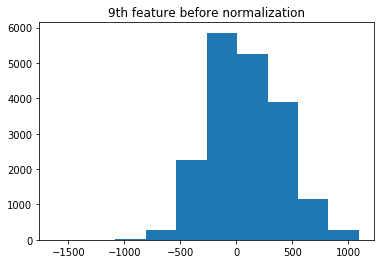

In [6]:
# histograms
plt.hist(df[8])
plt.title('9th feature before normalization')
plt.show()

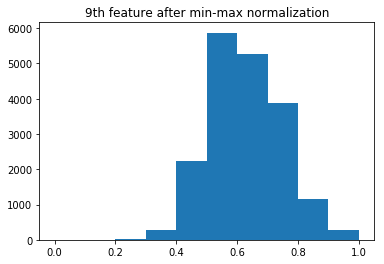

In [7]:
plt.hist(df_min_max[8])
plt.title('9th feature after min-max normalization')
plt.show()

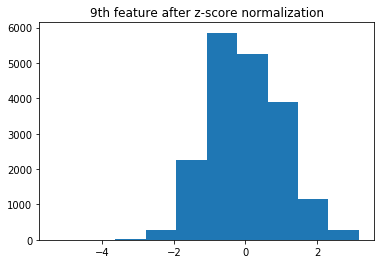

In [8]:
plt.hist(df_z_scaler[8])
plt.title('9th feature after z-score normalization')
plt.show()

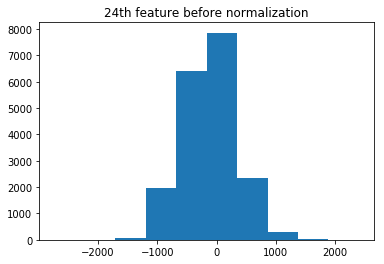

In [21]:
plt.hist(df[23])
plt.title('24th feature before normalization')
plt.show()

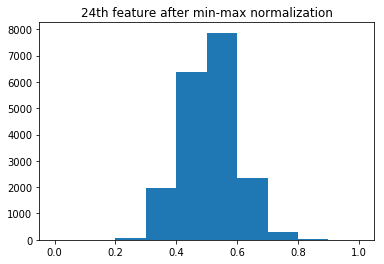

In [22]:
plt.hist(df_min_max[23])
plt.title('24th feature after min-max normalization')
plt.show()

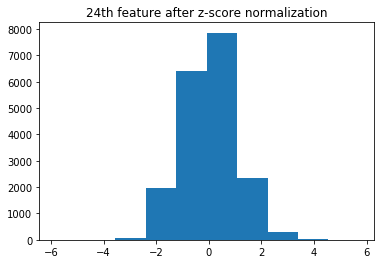

In [23]:
plt.hist(df_z_scaler[23])
plt.title('24th feature after z-score normalization')
plt.show()

The main difference before and after normalization are that the scale of the data points has changed, the mean and the variance have changed. However, the histogram shape remains unchanged, which represents the data distribution. The main goal of normalization is feature scaling, which is to get all the features in the same scale so that we can perform later analysis correctly.

In [10]:
#Q2

#1. PCA, eigen values, eigen vectors
rawdataB = scipy.io.loadmat('DataB.mat')
X = rawdataB['fea']
y = rawdataB['gnd']
y = np.asarray([j for i in y for j in i])

scaler = StandardScaler()
X = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X)
eigenValues, eigenVectors = pca.explained_variance_, pca.components_

/Users/mac/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The computed eigenValues and eigenVectors are stored as shown in the last line of the above cell.  

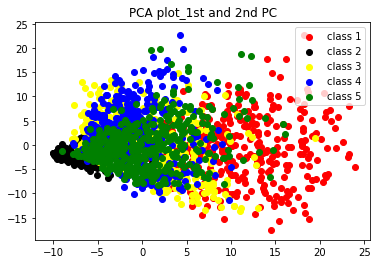

In [11]:
#2. two dimensional data representation, 1st and 2nd pcs 
plt.figure()
X_matrix = X_pca[:, 0:2]
classLable = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5']
colors = ['red', 'black', 'yellow', 'blue', 'green']
for color, i, class_name in zip(colors, [0, 1, 2, 3, 4], classLable):
    plt.scatter(X_matrix[y == i, 0], X_matrix[y == i, 1], color = color, label = class_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('PCA plot_1st and 2nd PC')
plt.show()

The distribution of the classes is shown in the above graph.
In this question, we plot the data in the new space constructed by the 1st and 2nd pca components.

On the first pca component, it explains the data variation mostly. PCA basically means that high information correspondes high variance, by doing this, we explained the highest variation in the data, maximize the within class difference.

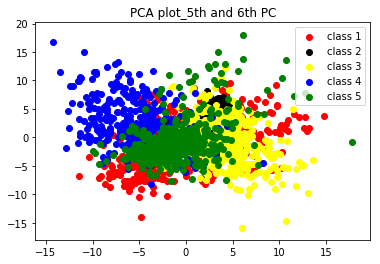

In [12]:
#3. two dimensional data representation, 5th and 6th pcs 
plt.figure()
X_matrix = X_pca[:, 4:6]
classLable = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5']
colors = ['red', 'black', 'yellow', 'blue', 'green']
for color, i, class_name in zip(colors, [0, 1, 2, 3, 4], classLable):
    plt.scatter(X_matrix[y == i, 0], X_matrix[y == i, 1], color = color, label = class_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('PCA plot_5th and 6th PC')
plt.show()

The distribution of the classes is shown in the above graph.
In this question, we plot the data in the new space constructed by the 5th and 6th pca components.

It is evident that the data variation in this space is smaller than the above one. Also we can interpret that PCA focuses on data variation instead of class differentiation, since the classes have a lot of overlaps. 

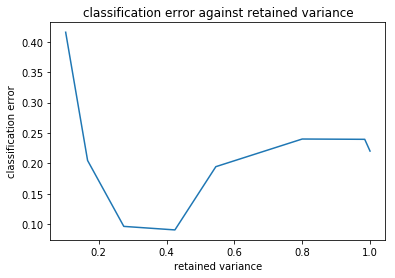

In [12]:
#4. naive bayes classification based on 8 sets of dimensionality reduced data
error = []
for pc in [2,4,10,30,60,200,500,784]:
    X_train = X_pca[:, 0:pc]
    y_train = y
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_train)
    a = 0
    i = 0
    while i < len(y_train):
        if y_train[i] != y_pred[i]:
            a += 1
        i += 1
    error.append(a/len(y_train))
rm = []
for pc in [2,4,10,30,60,200,500,784]: 
    rm.append(np.sum(pca.explained_variance_ratio_[0:pc]))
plt.figure()
plt.plot(rm, error)
plt.xlabel('retained variance')
plt.ylabel('classification error')
plt.title('classification error against retained variance')
plt.show()

In [9]:
#5. LDA two dimensions plotting  
lda = LDA(n_components = 2)
X_lda = lda.fit_transform(X, y) 
plt.figure()
classLable = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5']
colors = ['red', 'black', 'yellow', 'blue', 'green']
for color, i, class_name in zip(colors, [0, 1, 2, 3, 4], classLable):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color = color, label = class_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('LDA plot_1st and 2nd LP')
plt.show()

NameError: name 'X' is not defined

From the above figure, we can see that the five classes are well separated, that is because unlike PCA, LDA approach maximizes the between classes difference and minimize the within class variation. While PCA does better in terms of whole data variation and error, LDA outperforms for discrimination.

In [19]:
# Q3

#import dataset
rawdataB = scipy.io.loadmat('DataB.mat')
X = rawdataB['fea']
y = rawdataB['gnd']
y = np.asarray([j for i in y for j in i])


for i in range(len(y)):
    if y[i] == 3:
        a = i
        break
for i in range(len(y)):
    if y[i] == 4:
        b = i
        break

X3 = X[a:b, :]
y3 = y[a:b]
X3_images = np.float64(np.reshape(X3, (398, 28, 28)))

In [20]:
#hand written digits plotting function
def plot_embedding(temp, title=None):
    x_min, x_max = np.min(temp, 0), np.max(temp, 0)
    temp = (temp - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(temp.shape[0]):
        plt.text(temp[i, 0], temp[i, 1], str("."),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X3.shape[0]):
            dist = np.sum((temp[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [temp[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X3_images[i], cmap=plt.cm.gray_r),
                temp[i], frameon = False)
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

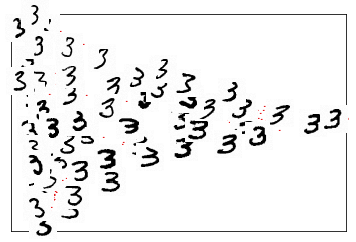

In [21]:
#1. digit '3' visualization based on 1st and 2nd LLE components 
lle = LLE(n_neighbors=5, n_components=2)
X3_lle = lle.fit_transform(X3)
plot_embedding(X3_lle)
plt.show()

According to the above figure, the distribution of all the digits '3' in the new space is approximately a triangle, the digits are not completely separated. Qualitatively, similar digits still stay pretty close, this is because by applying LLE, local properties are captured and maintained. The variation captured here can be descibed as the variation among different local segments in the whold space. 

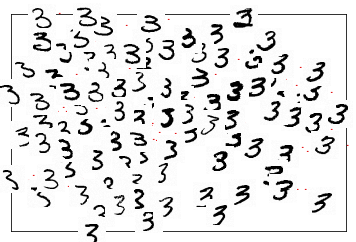

In [6]:
#2. repeat step 1 using Isomap
isomap = Isomap(n_neighbors=5, n_components=2)
X3_isomap = isomap.fit_transform(X3)
plot_embedding(X3_isomap)
plt.show()

According to above figure, the distribution of the digits in the new space are more dispersive and the digits are better separated compared to the previous one with LLE application. It seems that ISOMAP captures more variation in this case. ISOMAP does better when it comes to capturing the geometric properties in the whole space. And the patterns being found are globally based.

In [24]:
#3. LLE, ISOMAP, PCA and LDA comparison using naive bayes classifier
LLEForX = LLE(n_neighbors = 5, n_components = 4)
X_lle = LLEForX.fit_transform(X)

IsomapForX = Isomap(n_neighbors = 5, n_components = 4)
X_isomap = IsomapForX.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)


PCAForX = PCA(n_components = 4) 
X_pca = PCAForX.fit_transform(X)

LDAForX = LDA(n_components = 4)
X_lda = LDAForX.fit_transform(X,y)

clf = GaussianNB()
accuracy_lle = []
accuracy_isomap = []
accuracy_pca = []
accuracy_lda = []

for state in range(1447):
    
    X_lle_train, X_lle_test, y_lle_train, y_lle_test = train_test_split(X_lle, y, test_size = 0.3, random_state= state)
    clf.fit(X_lle_train, y_lle_train)
    y_lle_pred = clf.predict(X_lle_test)
    accuracy_lle.append(np.sum((y_lle_test == y_lle_pred))/len(y_lle_test))
    
    X_isomap_train, X_isomap_test, y_isomap_train, y_isomap_test = train_test_split(X_isomap, y, test_size = 0.3, random_state= state)
    clf.fit(X_isomap_train, y_isomap_train)
    y_isomap_pred = clf.predict(X_isomap_test)
    accuracy_isomap.append(np.sum((y_isomap_test == y_isomap_pred))/len(y_isomap_test))
    
    X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size = 0.3, random_state= state)
    clf.fit(X_pca_train, y_pca_train)
    y_pca_pred = clf.predict(X_pca_test)
    accuracy_pca.append(np.sum((y_pca_test == y_pca_pred))/len(y_pca_test))
    
    X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(X_lda, y, test_size = 0.3, random_state= state)
    clf.fit(X_lda_train, y_lda_train)
    y_lda_pred = clf.predict(X_lda_test)
    accuracy_lda.append(np.sum((y_lda_test == y_lda_pred))/len(y_lda_test))

print('Average accuracy for LLE, ISOMAP, PCA, LDA are {}'.format([np.mean(accuracy_lle), np.mean(accuracy_isomap), np.mean(accuracy_pca), np.mean(accuracy_lda)]))

Average accuracy for LLE, ISOMAP, PCA, LDA are [0.9337817954834251, 0.86501214972022211, 0.792637715406737, 0.99394854760683948]


We did the classification 1447 times and obtained the average accuracy at the end. There are 2066 observations in total, when the test size is 30%, there will be 620 observations in the test set and 1446 observations in the training set. Considering the benchmark that a single observation will be used in the training set at least once, we will at most need 2066-1446+1 = 621 iterations. Then considering the benchmark that a single observation will be used in the test set at least once, we will at most need 2066-620+1 = 1477 iterations. To sum up, we will need at most 1447 iterations to satisfy the above two benchmarks. 

According to the output of the average accuracy, LDA has the best performance which is nearly 0.994, then LLE with about 0.934, followed by ISOMAP with around 0.865, the performance of PCA is not that good with the score of approximate 0.793.

Based on the results, LDA outperformed LLE and ISOMAP may indicate that there is not much intrinsic low dimension manifold in this dataset, under this situation, the linear projection which aims to find the linear embedding data structure will do better. The reason that PCA did not do well is that PCA's objective is to obtain the dimension on which the data has maximum variation, which is more appropriate and useful for the data with unknown labels, rather than maximize between class variation which LDA focuses on.   